In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier # KNN

from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering


from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

np.random.seed(758475)

# Project 2

**this is NOT a group project**

So far in this course we have covered both *supervised* and *unsupervised* algorithms. Supervised algorithms *predict* a known outcome (either a continuous value like linear regression, or a categorical outcome like logistic regression, naive bayes, k-nearest neighbors, or decision trees), while unsupervised algorithms attempt to find structure in the data without a known outcome (like k-means, Gaussian Mixture Models (EM), or hierarchical agglomeretive clustering).

This project will use both, as well as compare the two. **You should write this project as if you're a data scientist who is presenting these results to people who are NOT data scientists**. You must put the answers the the questions (a-g/h) in a markdown cell and clearly indicate where you are answering each question.


## 1. Burgers or Pizza?

Using the dataset [*burgersOrPizza.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv), build 2 different models (each using a DIFFERENT algorithm, i.e. you cannot build two logistic regressions) that **predict whether or not a food item is a burger, or pizza**$^{[1]}$. 

**a)** explain which 2 algorithms you chose to use and why (including details like hyperparameters like k, max_depth...etc)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** choose ONE method of model validation, and explain why ( you must use the same method for both models; also, your reason must be based on aspects of the data and/or computational time/efficiency, and not on your lack of familiarity with the different methods).

**e)** explain how your model performed, and what metric you used to decide that.

**f)** compare the models: did one model do better than the other? Why do you think that was?

**g)** use ggplot to build at least 1 graph to help support your answers, and write a caption for this graph.




$^{[1]}$ The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

# 2. Donuts

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv) **build 2 clustering models** (using 2 different clustering algorithms)$^{[1]}$.

**a)** explain which 2 algorithms you chose to use and why (including which distance metrics you chose, similarity metrics..etc if applicable and why)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** use silhouette scores to choose the number of clusters. Is the number of clusters the same for both of your models?

**e)** explain how your models performed, and what metric you used to decide that.

**f)** compare the models: how similar were the clusters between the two models?

**g)** use ggplot to build a graph that helps demonstrate your point for part f, and write a caption for this graph.

**h)** for both models, plot the clusters with ggplot and describe each cluster (using bullet points). Talk about what characterizes each cluster (e.g. which variables that cluster is high/low in), and give a general descriptor for the cluster (e.g. "these donuts are likely seasonal donuts" or "these are healthy and/or gluten free donuts" etc...)

$^{[1]}$ The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [2]:
#1

borp = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv")

print(borp.shape)
borp.head()

(927, 25)


,Item_Name,Item_Description,Food_Category,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Chicken n Cheese Slider,Chicken n Cheese Slider on Mini Bun w/ Chicken...,Burgers,290.0,12.0,3.5,0.0,25.0,720.0,NaN,...,12,4,0.0,25,727,NaN,30,15,1.0,1.0
1,Corned Beef n Cheese Slider,Corned Beef n Cheese Slider on Mini Bun w/ Cor...,Burgers,220.0,9.0,3.5,0.0,30.0,890.0,NaN,...,10,4,0.0,33,978,NaN,23,15,1.0,1.0
2,Ham n Cheese Slider,Ham n Cheese Slider on Mini Bun w/ Roast Ham &...,Burgers,230.0,9.0,3.5,0.0,30.0,750.0,NaN,...,10,4,0.0,33,824,NaN,24,14,3.0,1.0
3,Jalapeno Roast Beef n Cheese Slider,Jalapeno Roast Beef n Cheese Slider on Mini Bu...,Burgers,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,11,5,0.0,31,684,NaN,21,14,1.0,1.0
4,Roast Beef n Cheese Slider,Roast Beef n Cheese Slider on Mini Bun w/ Roas...,Burgers,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,12,5,0.0,33,736,NaN,23,15,1.0,1.0


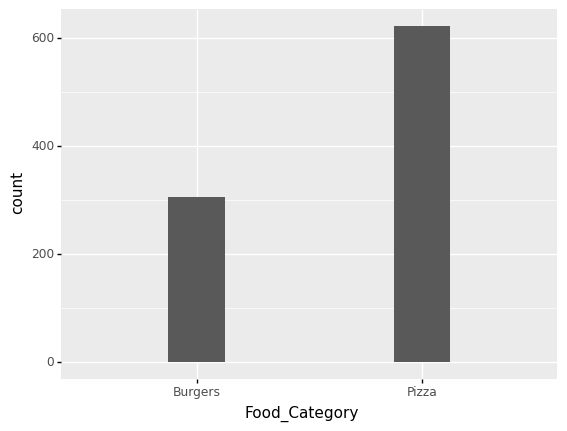

<ggplot: (80170727250)>

In [3]:
ggplot(borp, aes(x="Food_Category")) + geom_histogram()

There is an unreasonable data entry for Saturated_Fat_100g: the "1/3 lb Budweiser Beer Cheese Bacon Thickburger" has a value of 572 for Saturated_Fat_100g, the next highest is 10.

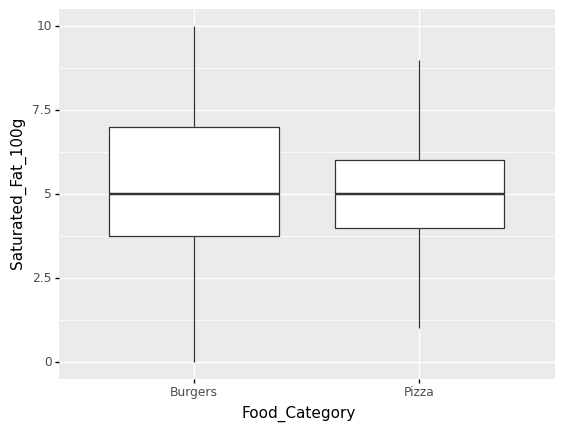

<ggplot: (80151512872)>

In [4]:
vlaid_SatFat = borp["Saturated_Fat_100g"] != 572
borp2 = borp.loc[vlaid_SatFat]

ggplot(borp2, aes(x="Food_Category", y="Saturated_Fat_100g")) + geom_boxplot()

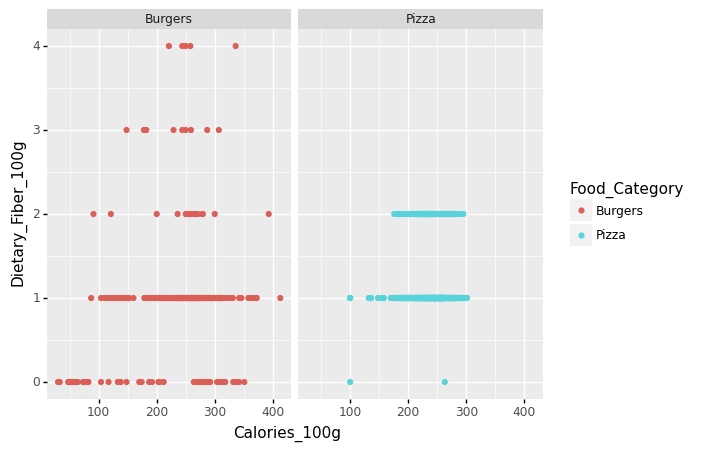

<ggplot: (80170763653)>

In [5]:
ggplot(borp, aes(x="Calories_100g", y="Dietary_Fiber_100g", color="Food_Category")) + geom_point() + facet_wrap("Food_Category")

In [6]:
predictors = ["Calories_100g", "Total_Fat_100g", "Saturated_Fat_100g", "Trans_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", "Sugar_100g"]

pred_outcome = predictors.copy()
pred_outcome.append("Food_Category")

borp3 = borp2[pred_outcome]
borp3 = borp3.dropna()

X = borp3[predictors]
y = borp3["Food_Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5464, shuffle=True)
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, random_state = 8946, shuffle=True)

X_train.head()

,Calories_100g,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g
53,187,14,6,1.0,40,465,3,13,2.0
125,199,9,4,0.0,22,532,20,9,2.0
215,226,9,4,0.0,24,568,26,10,3.0
775,242,9,5,0.0,26,614,29,12,5.0
94,291,20,8,1.0,63,408,12,16,2.0


In [7]:
z = StandardScaler()

z.fit(X_train)
XZ_train = z.transform(X_train)
XZ_test = z.transform(X_test)
XZ_train_valid = z.transform(X_train_valid)
XZ_test_valid = z.transform(X_test_valid)

### Decision Tree

In [8]:
# run a rough model on the whole training set to find a natural max depth

tree = DecisionTreeClassifier(random_state = 543)
tree.fit(X_train,y_train)

maxDepth = tree.get_depth()

In [9]:
# perform hyperparameter tuning

tunedAcc = 0
tunedDepth = 0

for i in range(1, maxDepth+1):
    tree_temp = DecisionTreeClassifier(random_state = 1654, max_depth=i)
    tree_temp.fit(X_train_valid,y_train_valid)

    acc = accuracy_score(y_test_valid, tree_temp.predict(X_test_valid))

    if acc > tunedAcc:
        tunedAcc = acc
        tunedDepth = i

print(tunedDepth)

8


Accuracy Score (test):  0.9553072625698324


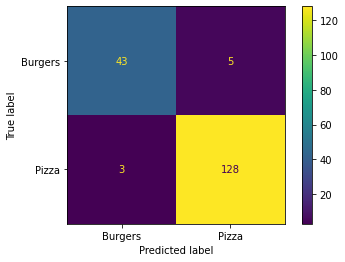

In [10]:
# Fit the model with the tuned max depth and the entire training set

tree = DecisionTreeClassifier(random_state = 56465, max_depth=tunedDepth)

tree.fit(XZ_train,y_train)

#Testing Accuracy

print("Accuracy Score (test):  " + str(accuracy_score(y_test,tree.predict(XZ_test))))
plot_confusion_matrix(tree, XZ_test, y_test)

Accuracy Score (train):  0.9761904761904762


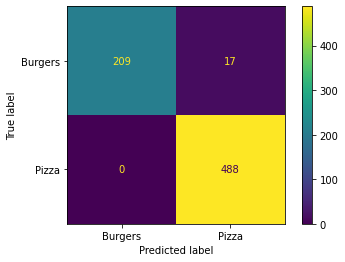

In [11]:
#Training Accuracy

print("Accuracy Score (train):  " + str(accuracy_score(y_train,tree.predict(XZ_train))))
plot_confusion_matrix(tree, XZ_train, y_train)

### K Nearest Neighbors

In [12]:
#perform hyperparameter tuning to find the optimal value for k

tunedAcc = 0
tunedK = 0

for i in range(1, XZ_train_valid.shape[0]):
    knn_temp = KNeighborsClassifier(n_neighbors = i)
    knn_temp.fit(XZ_train_valid, y_train_valid)

    acc = accuracy_score(y_test_valid, knn_temp.predict(X_test_valid))

    if acc > tunedAcc:
        tunedAcc = acc
        tunedK = i

print(tunedK)

43


Accuracy Score (test):  0.9385474860335196


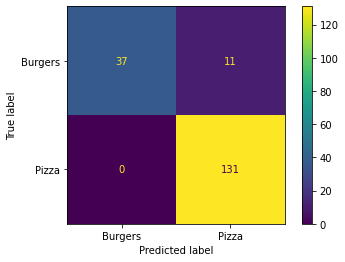

In [13]:
# Fit the model with the tuned k neighbors and the entire training set

knn = KNeighborsClassifier(n_neighbors = tunedK)

knn.fit(XZ_train,y_train)

print("Accuracy Score (test):  " + str(accuracy_score(y_test,knn.predict(XZ_test))))
plot_confusion_matrix(knn, XZ_test, y_test)

Accuracy Score (train):  0.8851540616246498


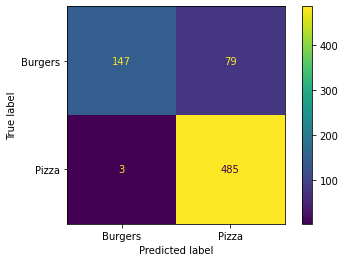

In [14]:
print("Accuracy Score (train):  " + str(accuracy_score(y_train,knn.predict(XZ_train))))
plot_confusion_matrix(knn, XZ_train, y_train)

**a)** explain which 2 algorithms you chose to use and why (including details like hyperparameters like k, max_depth...etc)
- I chose to use Decision Trees and K-Nearest Neighbors as my two algorithms. 
- I used Decision Trees because of their ability to classify unseen data in a non-continuous way. This makes Decision trees very strong when certain values of predictors only appear for one of the categories (i.e. if a food item has Calories_100g below 100, there is a 100% chance the food is a burger because all pizza has more than 100 calories per 100g). After exploring the data, I found a lot of cases similar to this.
- I used KNN because I assumed that because most burgers have similar compositions to other burgers and most pizzas have similar compositions to other pizzas, the key assumption for KNN would hold true: that items in the same category have similar predictor values. This assumption mostly held true when building the model.
- For both algorithms the hyperparameters (max tree depth and k respectively) were calculated using automated hyperparameter tuning. The training set was split further into a smaller training set and a validation set. Many models were built from the smaller training set and differing values for the hyperparameters. The hyperparameter values from the models that maximized accuracy when tested with the validation set were used to build the final decision tree and KNN models. The optimal max depth was found to be 8, and the optimal number of neighbors was found to be 43.

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)
- Because the different foods come in so many different size portions, only variables per 100 grams of food are used so all data points are standardized based on thier composition. The name and description of the food is disregarded as well. Among the remaining variables, Potassium_100g is dropped because there are simply too many missing values (none of the pizzas have a value for Potassium_100g), and Dietary_Fiber_100g is dropped because there is simply too little variance in this variable; the averages are the same for both food types and there are only a handful of burgers with more than a value of 2 for fiber in the data set.
- The remaining predictors are:
    - Calories_100g
    - Total_Fat_100g
    - Saturated_Fat_100g
    - Trans_Fat_100g
    - Cholesterol_100g
    - Sodium_100g
    - Carbohydrates_100g
    - Protein_100g
    - Sugar_100g

**c)** explain whether or not you decided to z-score your variables and why.
- The variables were z-scored so all predictors are on the same scale. Some of the predictors have wide numerical ranges and lots of possible values (e.g. Calories_100g ranges from 20 to 413), while others have much smaller ranges (e.g. Saturated_Fat_100g ranges from 0-10). Note: standardization is irrelevand when using decision trees because there is no assumption that the data is all on the same scale. However, z-scoring is required when using KNN because the algorithm calculates distance between points; if the data is not standardized, data on smaller scales would hold much more weight than other variables. This technically introduces a tiny bit of data leakage into the validation set, but that should be negligable. In the final model, the standardized values will be used.

**d)** choose ONE method of model validation, and explain why 
- Train-Test-Split (training on 80% of the data) with hyperparameter tuning (using a validation set that is 20% of the training data) is beign used. Because of the use of hyperparameter tuning, performance is of higher importance, even considering the relatively small data set. Using a validation set with k-fold or leave one out would greatly increase complexity and time of computation. TTF allows for quick and simple model validation and hyperparameter tuning.

**e)** explain how your model performed, and what metric you used to decide that.
- Decision Tree:
    - The model performed extremely well and doesn't seem to be overfit. The accuracy score is extremely high and the confusion matrix shows that for the test set, the model was only incorrect 8 times. It's worth noting that the model is far more likely to falsely classify something as pizza when it is actually a burger than to incorrectly lable pizza as a burger.
- K- Nearest Neighbors:
    - The KNN model also performed very well, but was about 1% less accurate than the Decision Tree. The accuracy score was about 94% and the confision matrix showed that the model was good at predicting that a data point is pizza. However it was relatively poor at correctly categorizing burgers, overpredicting pizza. Strangely, the accuracy score for the testing set was higher than the accuracy score for the training set, the reason for this is unknown.

**f)** compare the models: did one model do better than the other? Why do you think that was?
- The decision tree performed slightly better than the KNN model. I think this is because while pizzas are more similar to each other than burgers (and vice versa) because of the ingredients of the two different types of food, there are certain values for all the nutrition facts that are extremely unlikely in one food but common in the other. For example, Pizzas tend to have more carbs and less fat then burgers. Decision trees are more sensitive to those kinds of trends than KNN models are, and for this data set, those trends simply mattered more than the category of neighbors.

**g)** use ggplot to build at least 1 graph to help support your answers, and write a caption for this graph.

In [15]:
treePred = tree.predict(XZ_test)
knnPred = knn.predict(XZ_test)

results = pd.DataFrame({"trueVal": y_test, "treePred" : treePred, "knnPred": knnPred})

agree = []
for i in range(0, results.shape[0]):
    agree.append("Agree" if results.iloc[i]["treePred"] == results.iloc[i]["knnPred"] else "Disagree")

results["Agree"] = agree
 
results["treeCorrect"] = results["treePred"] == results["trueVal"]

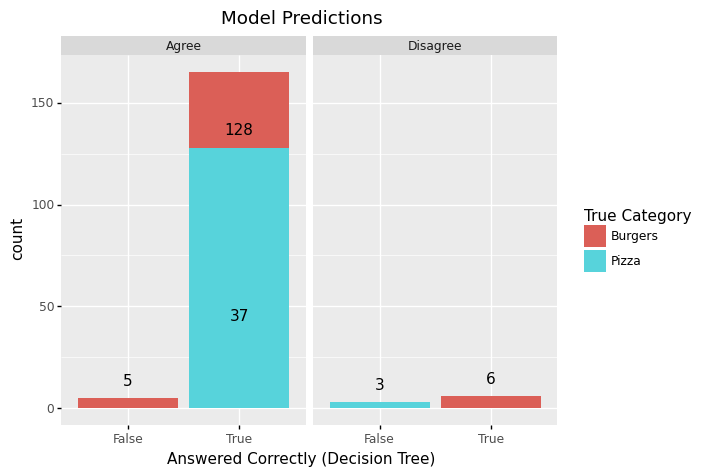

<ggplot: (80174776375)>

In [16]:
(ggplot(results, aes(x = "treeCorrect", fill="trueVal")) + 
 facet_wrap("Agree") +
 geom_bar() +
 geom_text(aes(label='stat(count)'),stat='count',nudge_y=5,va='bottom') +
 ggtitle("Model Predictions") +
 labs(x="Answered Correctly (Decision Tree)", fill="True Category"))

This plot indicates that the vast majority of the time, the two models are in agreement and correct. There are only 5 cases for the test set in which the two models were incorrect despite being in agreement. For all 5 of those cases, the decision tree and the knn model predicted pizza. For all 9 times that the models disagreed, the decision tree predicted burgers and the knn predicted pizza. Of those 9 times, the decision tree was correct in 6 cases.

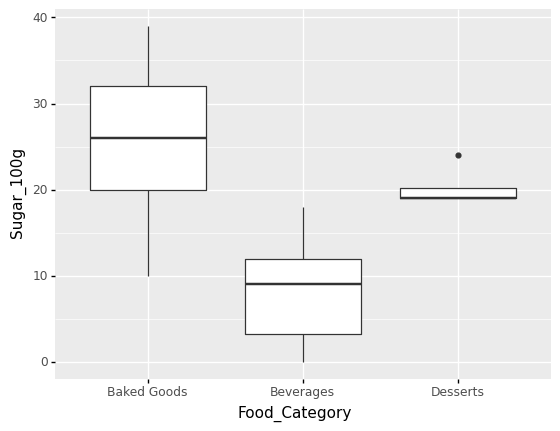

<ggplot: (80170905426)>

In [18]:
# Data Exploration

(ggplot(kk, aes(x="Food_Category", y="Sugar_100g")) + geom_boxplot())

After inspection of the dataset, it is clear that any attempt to categorize baked goods, beverages, and desserts in the same model would result in unuseful categories wherein very different food items are contained in the same category. For a hierarchical modeling algorithim, this likely wouldn't be a problem, because similar foods within each of the three main categories would be grouped together first before forming a much larger group that encompases the entire category. However, to avoid too much parity between the two models, the data will be trimmed to only include Baked goods.

In [19]:
bg = kk.loc[kk["Food_Category"] == "Baked Goods"]

bg.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


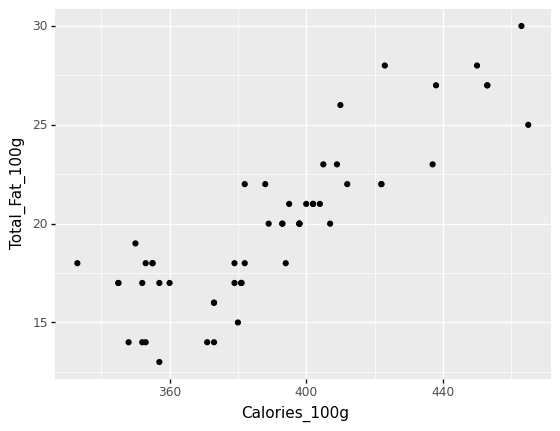

<ggplot: (80170873540)>

In [20]:
(ggplot(bg, aes(x="Calories_100g", y="Total_Fat_100g")) + geom_point())

In [56]:
properties = ["Calories_100g", "Total_Fat_100g", "Saturated_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", "Sugar_100g"]

X = bg[properties]

In [57]:
# Gaussian Mixture

k_best_GM = 0
max_silhouette_GM = 0
gm_best = GaussianMixture()


for i in range(2,15):
    gm_test = GaussianMixture(n_components=i)
    gm_test.fit(X)
    tempAssignment = gm_test.predict(X)

    sil_test = silhouette_score(X, tempAssignment)

    if sil_test > max_silhouette_GM:
        k_best_GM = i
        max_silhouette_GM = sil_test
        gm_best = gm_test

print("The optimal number of groups is: k=" + str(k_best_GM))
print("The silhouette Score for that many groups is:  " + str(max_silhouette_GM))
print()

bg["GM_Cat"] = gm_best.predict(X)

for i in range(0, k_best_GM):
    print("Average Scores for Cluster " + str(i))
    inGroup = bg['GM_Cat'] == i
    XCat = X.loc[inGroup]

    for name in properties:
        avg = XCat[name].mean()

        print("\t" + name + ": " + str(avg))
    print()

The optimal number of groups is: k=2
The silhouette Score for that many groups is:  0.7502813137987608

Average Scores for Cluster 0
	Calories_100g: 392.8636363636364
	Total_Fat_100g: 20.454545454545453
	Saturated_Fat_100g: 9.545454545454545
	Cholesterol_100g: 0.8181818181818182
	Sodium_100g: 165.36363636363637
	Carbohydrates_100g: 47.56818181818182
	Protein_100g: 5.318181818181818
	Sugar_100g: 25.681818181818183

Average Scores for Cluster 1
	Calories_100g: 380.45454545454544
	Total_Fat_100g: 17.272727272727273
	Saturated_Fat_100g: 7.0
	Cholesterol_100g: 33.54545454545455
	Sodium_100g: 439.72727272727275
	Carbohydrates_100g: 51.63636363636363
	Protein_100g: 4.363636363636363
	Sugar_100g: 27.0



The optimal number of groups is: k=2
The optimal linkage method is:  complete
The silhouette Score for that many groups and that linkage is:  0.7607132683068513

Average Scores for Cluster 0
	Calories_100g: 391.69565217391306
	Total_Fat_100g: 20.195652173913043
	Saturated_Fat_100g: 9.391304347826088
	Cholesterol_100g: 2.0
	Sodium_100g: 171.65217391304347
	Carbohydrates_100g: 47.891304347826086
	Protein_100g: 5.260869565217392
	Sugar_100g: 26.108695652173914

Average Scores for Cluster 1
	Calories_100g: 383.6666666666667
	Total_Fat_100g: 17.88888888888889
	Saturated_Fat_100g: 7.222222222222222
	Cholesterol_100g: 34.77777777777778
	Sodium_100g: 468.55555555555554
	Carbohydrates_100g: 50.888888888888886
	Protein_100g: 4.444444444444445
	Sugar_100g: 25.11111111111111



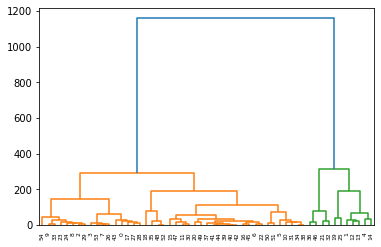

In [58]:
linkages = ["ward", "complete", "average", "single"]
bestLinkage = ""
bestClusters = 0
max_silhouette_AG = 0

hac = AgglomerativeClustering()

for i in range(2, 15):
    tempBestSil = 0
    tempBestLink = ""

    tempHAC = AgglomerativeClustering()

    for link in linkages:
        tempHAC = AgglomerativeClustering(n_clusters=i, linkage=link)
        tempCat = tempHAC.fit_predict(X)
        sil_test = silhouette_score(X, tempCat)

        if sil_test > tempBestSil:
            tempBestSil = sil_test
            tempBestLink = link
    
    if tempBestSil > max_silhouette_AG:
        max_silhouette_AG = tempBestSil
        bestLinkage = tempBestLink
        bestClusters = i

print("The optimal number of groups is: k=" + str(bestClusters))
print("The optimal linkage method is:  " + str(bestLinkage))
print("The silhouette Score for that many groups and that linkage is:  " + str(max_silhouette_AG))
print()

hac = AgglomerativeClustering(n_clusters=bestClusters, linkage=bestLinkage)
bg["HAC_Cat"] = hac.fit_predict(X)

for i in range(0, bestClusters):
    print("Average Scores for Cluster " + str(i))
    inGroup = bg['HAC_Cat'] == i
    XCat = X.loc[inGroup]

    for name in properties:
        avg = XCat[name].mean()

        print("\t" + name + ": " + str(avg))
    print()

dendro_sing = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [17]:
#2 
kk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")

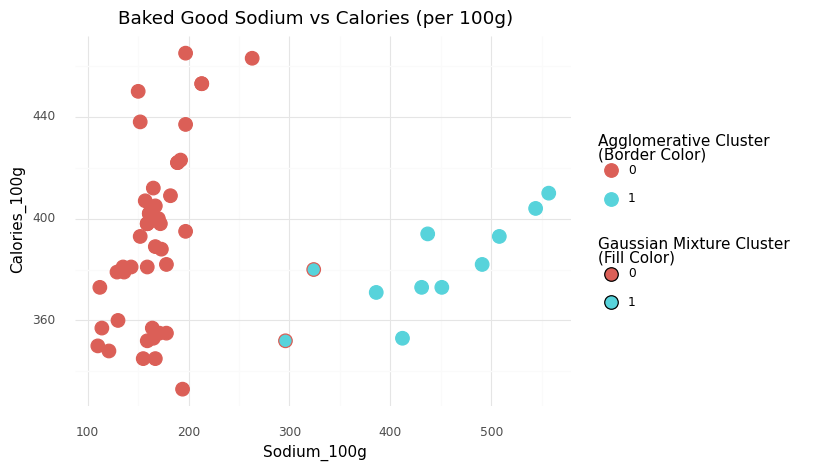

<ggplot: (80177169523)>

In [60]:
(ggplot(bg, aes(x="Sodium_100g", y="Calories_100g", color="factor(HAC_Cat)", fill="factor(GM_Cat)")) 
+ geom_point(size=5)
+ labs(color="Agglomerative Cluster\n(Border Color)", fill="Gaussian Mixture Cluster\n(Fill Color)")
+ ggtitle("Baked Good Sodium vs Calories (per 100g)")
+ theme_minimal())

The plot above shows the calories of the baked goods given the amound of sodium of the good. The fill color is a representation of the cluster assigned to the good by the Gaussian Mixture model and the border color represents the cluster assigned to the good by the Agglomerative Clustering model. When the fill color and the border color are the same, the two models agree on the cluster for the good. There are only two goods where the models disagree as shown by the two points with differing border and fill colors in the middle of the plot.

**h)** for both models, plot the clusters with ggplot and describe each cluster (using bullet points). Talk about what characterizes each cluster (e.g. which variables that cluster is high/low in), and give a general descriptor for the cluster (e.g. "these donuts are likely seasonal donuts" or "these are healthy and/or gluten free donuts" etc...)

- Cluster 0 seems to be the classic Krispy Kream fluffy doughnut and all variants/flavors of that recipe. It appears that this recipe is significantly lower in sodium than their cake doughnut recipe which is the main distinguishing feature between the two.
- Cluster 1 seems to be doughnuts made with a cake doughnut recipe (more similar to the kind of doughnuts found in smaller doughnut shops). These doughnuts seem to be higher in sodium per 100g than the classic recipe.
- Additionally, there is significantly more cholesterol present in baked goods in cluster 1; most cluster 0 goods have no cholesterol at all.

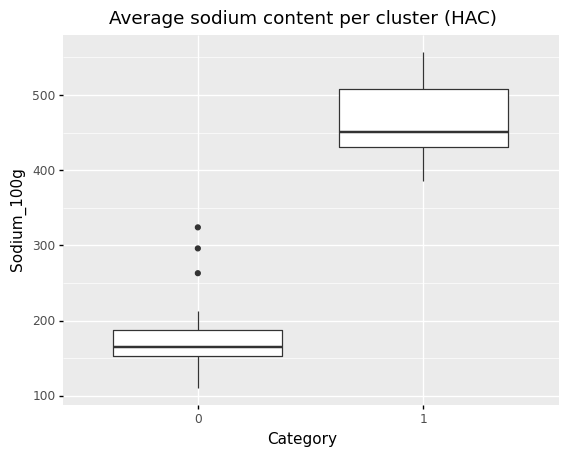

<ggplot: (80179749226)>

In [71]:
(ggplot(bg, aes(x="factor(HAC_Cat)", y="Sodium_100g")) 
+ geom_boxplot()
+ ggtitle("Average sodium content per cluster (HAC)")
+ labs(x="Category")) 

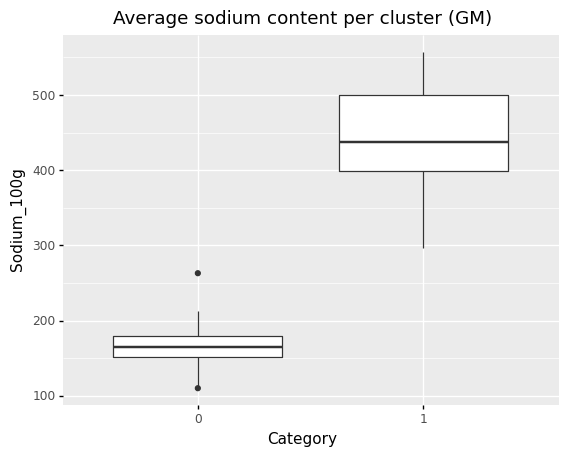

<ggplot: (80179889017)>

In [72]:
(ggplot(bg, aes(x="factor(GM_Cat)", y="Sodium_100g")) 
+ geom_boxplot()
+ ggtitle("Average sodium content per cluster (GM)")
+ labs(x="Category")) 

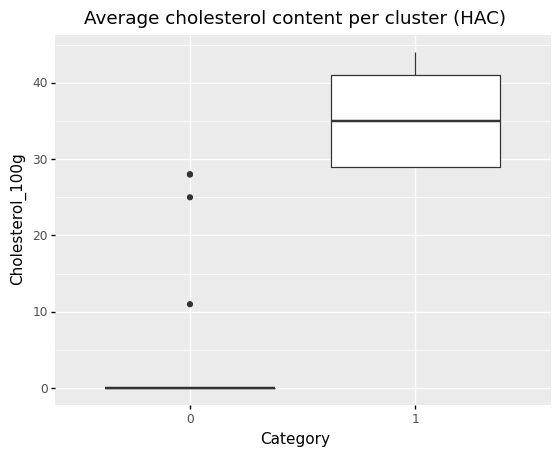

<ggplot: (80179730466)>

In [73]:
(ggplot(bg, aes(x="factor(HAC_Cat)", y="Cholesterol_100g")) 
+ geom_boxplot()
+ ggtitle("Average cholesterol content per cluster (HAC)")
+ labs(x="Category")) 

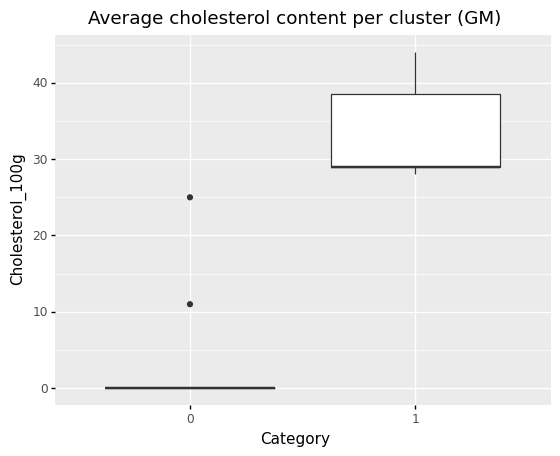

<ggplot: (80179749268)>

In [74]:
(ggplot(bg, aes(x="factor(GM_Cat)", y="Cholesterol_100g")) 
+ geom_boxplot()
+ ggtitle("Average cholesterol content per cluster (GM)")
+ labs(x="Category")) 

AgglomerativeClustering**a)** explain which 2 algorithms you chose to use and why (including which distance metrics you chose, similarity metrics..etc if applicable and why)
- Gaussian Mixture and Agglomerative Clustering were both used to cluster the set of baked goods. Because of the small size of the data set (even before trimming to just baked goods), the performance of the models isn't an issue whatsoever. I wanted to use both a hierarchical clustering model and a neighbor counting model to see if the two different kinds of models would yield differing clusters. For neighbor counting methods, gaussian mixture tends to have similar or better results than K-means and is more versital at the cost of slower performance, which is a non-issue in this case. Agglomerative Clustering was chosen as the hierarchical model to contrast Gaussian Mixture.

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)
- As with the burger/pizza data set, I chose to only use the nutrition values for 100 grams of each given food to avoid any issues that may arrise from differing portion sizes. This is less of an issue with the Krispy Kream data set, because doughnut tend to have similar serving sizes anyway, but the consideration was taken nonetheless. Of the data points remaining, all names, serving information, descriptions, variables referring to the Krispy Kream, and variables with null values were dropped. This left the following set of eight variables:
    - Calories_100g
    - Total_Fat_100g
    - Saturated_Fat_100g
    - Cholesterol_100g
    - Sodium_100g
    - Carbohydrates_100g
    - Protein_100g
    - Sugar_100g


**c)** explain whether or not you decided to z-score your variables and why.
- I decided not to z-score my variables simply because I ran the modesl with and without z-scoring and the clusters generated from unscaled data had significantly higher silhouette scores.

**d)** use silhouette scores to choose the number of clusters. Is the number of clusters the same for both of your models?
- Yes, the number of clusters for both models ended up being the same: 2

**e)** explain how your models performed, and what metric you used to decide that.
- Both models seemed to do very well with two clusters. The silhouette scores for both were around 0.75 (with the Agglomerative Clustering model performing only slightly better). The dendrogram built with the Agglomerative model showed extremely high separation between the two groups, however the cohesion was a bit low (as shown by the very large vertical distance between the two main clusters and the slightly low density at the bottom of the plot).

**f)** compare the models: how similar were the clusters between the two models?
- The two models were nearly identical. There were only 2 data points that were classified differetly between the models: the Glazed Chocolate Cake Doughnut and the Glazed Sour Cream Cake Doughnut.

**g)** use ggplot to build a graph that helps demonstrate your point for part f, and write a caption for this graph.